# Q1: Mooney-Rivlin

## a)

**Newton's Method**     
Find roots using iteration:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$


**Rearrange to get get 0**

$$T = \big( \alpha + \frac{\beta}{\lambda} \big) \big( \lambda^2 - \frac{1}{\lambda} \big)$$

$$0 = \big( \alpha + \frac{\beta}{\lambda} \big) \big( \lambda^2 - \frac{1}{\lambda} \big) - T$$

**Derive to get grad**

$$\big( \alpha + \frac{\beta}{\lambda} \big) 
\frac{d}{d\lambda} \big[ \lambda^2 - \frac{1}{\lambda} \big] 
+
\frac{d}{d\lambda} \big[ \alpha + \frac{\beta}{\lambda}\big] 
\big( \lambda^2 - \frac{1}{\lambda} \big) 
- 
\frac{d}{d\lambda} \big[ T \big]$$

$$\big( \alpha + \frac{\beta}{\lambda} \big) 
\big(\frac{d}{d\lambda} \big[ \lambda^2 \big] +
\frac{d}{d\lambda} \big[ -\frac{1}{\lambda} \big]\big)
+
\big(\frac{d}{d\lambda} \big[ \alpha  \big] +
\frac{d}{d\lambda} \big[ \frac{\beta}{\lambda} \big]\big)
\big( \lambda^2 - \frac{1}{\lambda} \big) $$

$$\big( \alpha + \frac{\beta}{\lambda} \big) 
\big( 2 \lambda + \lambda^{-2} \big)
+
\big( -\beta \lambda^{-2} \big)
\big( \lambda^2 - \frac{1}{\lambda} \big) $$

$$\beta + 2\alpha\lambda + \frac{\alpha}{\lambda^2} + \frac{2\beta}{\lambda^3}$$

**Newton's Method Implementation**

In [1]:
def newtonMethod(func, grad, args, x_init):
    x = x_init
    max_iter = 1000
    n_iter = 0
    while n_iter < max_iter and abs(func(x,*args) - 0) > 1e-05: # acurate to 4 sf
        x = x - func(x,*args)/grad(x,*args)
        n_iter += 1
    print("Terminated after {} iterations with error {}".format(n_iter,abs(func(x,*args) - 0)))
    return(x)

def f(l,a,b,T):
    t1 = a + b/l
    t2 = l**2 - 1/l
    return(t1*t2-T)

def g(l,a,b,T):
    t1 = b
    t2 = 2*a*l
    t3 = a/l**2
    t4 = (2*b)/l**3
    return(t1+t2+t3+t4)

In [9]:
newtonMethod(f,g,(2,3,4),1)

Terminated after 3 iterations with error 1.240105644839673e-07


1.302775627485792

## b)

**Fundamental Theorem of Calculus**
$$\int_{a}^{b} f(x) dx = f(b) - f(a)$$

$$\int_{0}^{x} u(x) dx = u(x) - u(0)$$

$$\int_{0}^{x} u(x) dx = u(x) - u(0)$$

From the question:
$$\lambda = 1 + \frac{du}{dx}$$
$$\int \lambda - 1 dx = \int du$$
$$\lambda(x) - x = u(x)$$

Subbing in this definition of $u(x)$

$$(\lambda(x) - x) - (\lambda(0) - 0) = u(x) - u(0)$$
$$ -x + \lambda(x) - \lambda(0) = u(x) - u(0)$$

Subbing in the Fundamental Theorem of Calculus for $\lambda$

$$ -x + \int_{0}^{x} \lambda(s) ds = u(x) - u(0)$$
$$ u(x) =  u(0) - x + \int_{0}^{x} \lambda(s) ds$$


## c)

**Trapezoidal Rule**      

$$\int_a^b f(x) dx = \sum_{k=1}^N \frac{f(x_{k-1}) + f(x_k)}{2}\frac{b-a}{N}$$

**Using our derivation from part (b)**      

$$ u(x) =  u(0) - x + \int_{0}^{x} \lambda(s) ds$$

**Subbing in the trapezoidal rule on $\lambda$**      

$$ u(x) =  u(0) - x + \sum_{k=1}^N \frac{\lambda(x_{k-1}) + \lambda(x_k)}{2}\frac{x}{N}$$

$$ u_i =  u_0 - x_i + \sum_{k=1}^N \frac{\lambda(x_{k-1}) + \lambda(x_k)}{2}\frac{x_i}{N}$$

## d)

In [21]:
# get lambdas
import numpy as np

n = 20
l = 1
a = 20
b = 10

lambda_is = []

def T(x,a,b):
    num = x**2*(a*(1+x**2)+b)
    den = (1+x**2)**2
    return(num/den)

for x in np.linspace(0,l,n):
    t = T(x,a,b)
    lambda_is.append(newtonMethod(f,g,(a,b,t),1))

Terminated after 0 iterations with error 0.0
Terminated after 2 iterations with error 2.3791246750448636e-12
Terminated after 2 iterations with error 5.667143421206333e-10
Terminated after 2 iterations with error 1.2999559428905627e-08
Terminated after 2 iterations with error 1.1158618073991988e-07
Terminated after 2 iterations with error 5.506405968969119e-07
Terminated after 2 iterations with error 1.8959412240171503e-06
Terminated after 2 iterations with error 5.061899578606699e-06
Terminated after 3 iterations with error 3.623767952376511e-13
Terminated after 3 iterations with error 1.2523315717771766e-12
Terminated after 3 iterations with error 3.397282455352979e-12
Terminated after 3 iterations with error 7.720935002453189e-12
Terminated after 3 iterations with error 1.503686064552312e-11
Terminated after 3 iterations with error 2.5911717216331454e-11
Terminated after 3 iterations with error 4.0401459955319297e-11
Terminated after 3 iterations with error 5.8038907013724383e-11
Te

In [22]:
lambda_is

[1,
 1.0009202441855551,
 1.0036440180214914,
 1.008063694644103,
 1.0140102656632453,
 1.0212673672060246,
 1.029588153177227,
 1.0387128800616712,
 1.0483853338051745,
 1.0583659122564089,
 1.0684418605839692,
 1.0784328360473483,
 1.0881932031411885,
 1.0976113702455799,
 1.1066070667012236,
 1.1151273815353127,
 1.1231422576731502,
 1.1306399611299347,
 1.1376228688038548,
 1.144103767918714]

In [28]:
def trap(xi,lambdas, N = 20):
    sumK = 0
    for k in range(1,N):
        sumK += (lambdas[k-1] + lambdas[k])/2*xi/N
    return(sumK)

u_is = []
u0 = 0
ind = 0
for t in np.linspace(0,l,n):
    u_is.append(u0-t+trap(t,lambda_is))
    ind += 1

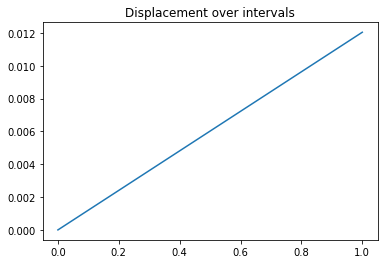

In [33]:
import matplotlib.pyplot as plt 

x = np.linspace(0,l,n)
plt.plot(x,u_is)
plt.title("Displacement over intervals")
plt.show()

## e)

When we need to solve then integrate something that would not be reasonable to solve analytically. For example, if we wanted to find the speed at which predators must eat prey in a system in order for the system to be stable, and then find the number of prey that had been eaten from an initial value starting point to be able to get to that stable state.

# Q2: Comparing Methods

## a)

I'd expect Euler's method to be the fastest because it has less terms and requires less calculations for each step.

For Eulers method, it is a calculation of a single gradient and an addition.

For Runge-Kutta methods, it requires calculations of multiple gradients at multiple points.

Thus while all the algorithms' speed are on the same order of magnitude O(n), they have different multiplicative coefficients on that order of magnitude.

## b)

I'd expect Runge-Kutta 4 to be more accurate because it takes into account more terms and the order of magnitude of its error is O(k^4).

In contrsast, the order of accuracy of Euler's method is O(k) while the order of accuracy of Runga-Kutta 2 is O(k^2)


## c)

All three are conditionally stable methods. Thus, which method we would use would depend on our terms. The Runga Kutta methods have a polynomial stabillity function which varies slightly depending on the method used to derive it while Euler's method has a stability function of $|1-rk| < 1$.

Thus depending on the function we are trying to compute, we need to select a method for which the stability function of that method is satisfied.

## d)

In [36]:
# function
import math

def f(t,y):
    return(math.e**-y + t**5)

In [48]:
# Euler

# yj+1 = yj+k(f(tj,yj))
def euler(f,y0,start,end,k):
    x,y = start,y0
    while x <= end:
        print(x,y)
        x += k
        y += k * f(x,y)
    return(y)

In [55]:
print("y(1) is",euler(f,1,0,1,0.1))

0 1
0.1 1.0367889441171443
0.2 1.0722800910032413
0.30000000000000004 1.1067458227758156
0.4 1.140833137895307
0.5 1.175913405838803
0.6 1.2145431089803072
0.7 1.2610346699211836
0.7999999999999999 1.3221387389201766
0.8999999999999999 1.4078441969030722
0.9999999999999999 1.5323112144764341
y(1) is 1.7149657929601712


In [50]:
# Runga Kutta 2
def rk2(f,y0,start,end,k):
    x,y = start,y0
    while x <= end:
        print(x,y)
        x += k
        t1 = f(x,y)
        t2 = f(x+k, y+k*t1)
        y += k/2 * (t1+t2)
    return(y)

In [56]:
print("y(1) is",rk2(f,1,0,1,0.1))

0 1
0.1 1.0361400455016205
0.2 1.071140706304064
0.30000000000000004 1.1054549382355476
0.4 1.140080039359667
0.5 1.1769583128125984
0.6 1.2194878107075589
0.7 1.2731445967796073
0.7999999999999999 1.3462228826017029
0.8999999999999999 1.4507084199534146
0.9999999999999999 1.603313319827442
y(1) is 1.826710410264603


In [52]:
# Runga Kutta 4
def rk4(f,y0,start,end,k):
    x,y = start,y0
    while x <= end:
        print(x,y)
        x += k
        t1 = f(x,y)
        t2 = f(x+0.5*k,y+0.5*t1)
        t3 = f(x+0.5*k,y+0.5*t2)
        t4 = f(x+k,y+t3)
        y += k/6 * (t1+t2+t2+t3+t3+t4)
    return(y)

In [57]:
print("y(1) is",rk4(f,1,0,1,0.1))

0 1
0.1 1.0313376227289026
0.2 1.0619329485293143
0.30000000000000004 1.092137919551149
0.4 1.122794379526591
0.5 1.1556032500627536
0.6 1.1936096157361178
0.7 1.2418269999146196
0.7999999999999999 1.308043749742745
0.8999999999999999 1.4038648656029011
0.9999999999999999 1.5460069104906389
y(1) is 1.7577473978715055


# Q3: Linearizing Systems

## a)

### i)

$$\left(\begin{array}{cc} 
4 & 0\\
0 & 2
\end{array}\right)$$

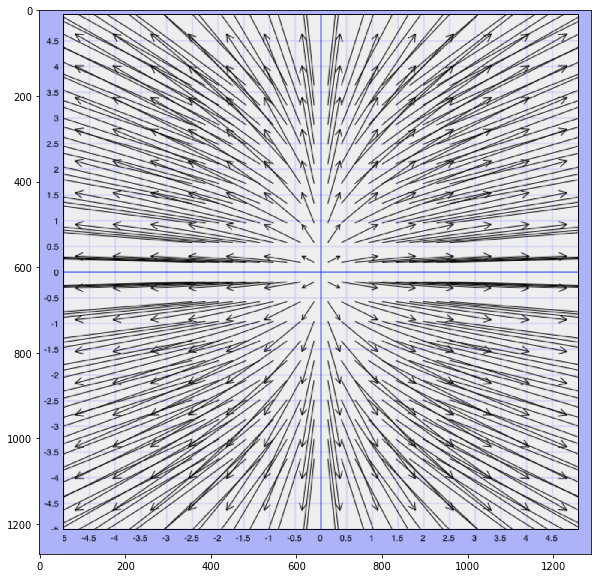

In [98]:
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
img=mpimg.imread('pg1.png')
imgplot = plt.imshow(img)
plt.show()

The only steady state solution here is the origin (0,0) and because all the arrows are pointing away from it, it is an unstable steady state solution. This shows that two positive eigenvalues creates a max point graph where the solution moves away from the steady state over time (unless you start and stay exactly at the steady state).

### ii)

$$\left(\begin{array}{cc} 
-4 & 0\\
0 & -2
\end{array}\right)$$

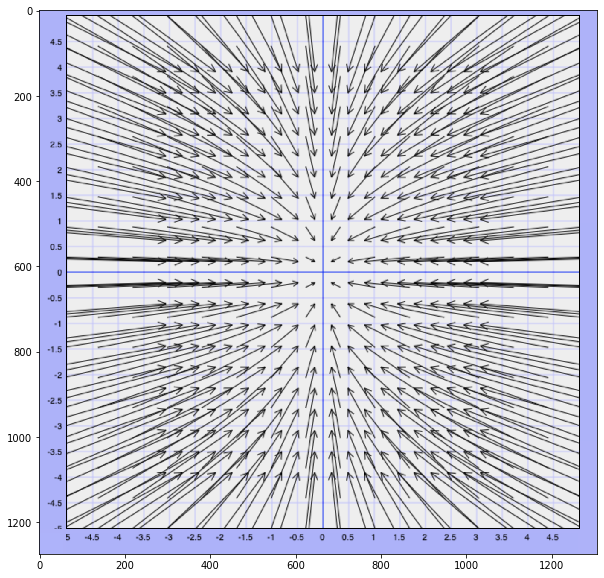

In [76]:
plt.figure(figsize=(10,10))
img=mpimg.imread('pg2.png')
imgplot = plt.imshow(img)
plt.show()

The only steady state solution here is the origin (0,0) and because all the arrows are pointing towards it, it is an stable steady state solution. This shows that two negative eigenvalues creates a min point graph where the solution moves towards from the steady state over time. Thus no matter your original starting point, the system will move towards and settle at the stedy state solution over time.

### iii)

$$\left(\begin{array}{cc} 
4 & 0\\
0 & -2
\end{array}\right)$$

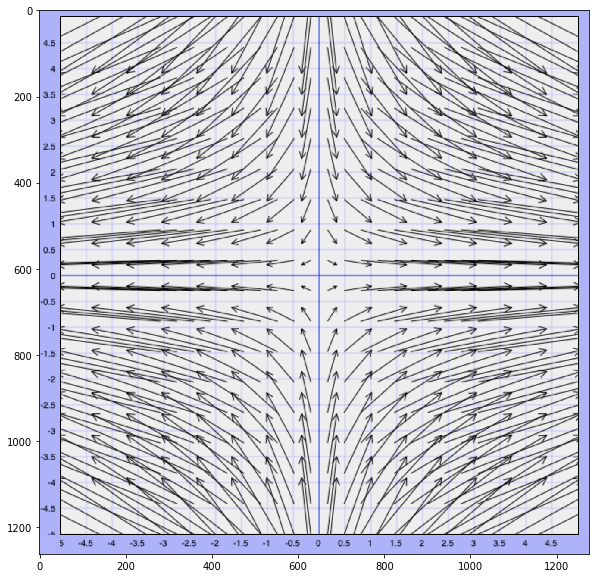

In [79]:
plt.figure(figsize=(10,10))
img=mpimg.imread('pg3.png')
imgplot = plt.imshow(img)
plt.show()

There are steady state solutions all along the axes (both x and y). The steady states along the x axis are stable because all the arrows are pointing towards it, and the steady states along the y axis are unstable because all the arrows are pointing away from it. This shows that a positive and a negative eigenvalue creates a saddle point graph where the solution moves away from the y axis and towards the x axis over time.

## b)

### i)

**Taylor's Approximation**      
$$f(x,y) = f(a,b) + f_x(a,b)(x-a) + f_y(a,b)(y-b)$$

**Approximating $f(x,y); g(x,y)$**      
$$f(x,y) = f(x*,y*) + f_x(x*,y*)(x-x*) + f_y(x*,y*)(y-y*)$$
$$g(x,y) = g(x*,y*) + g_x(x*,y*)(x-x*) + g_y(x*,y*)(y-y*)$$

### ii)

**Matrix Forms**       

$$\left(\begin{array}{cc} 
x*\\
y*
\end{array}\right)=\left(\begin{array}{cc} 
f_x(x*,y*) & f_y(x*,y*)\\
g_x(x*,y*) & g_y(x*,y*)
\end{array}\right)\left(\begin{array}{cc} 
x-x*\\
y-y*
\end{array}\right)+\left(\begin{array}{cc} 
f(x*,y*)\\
g(x*,y*)
\end{array}\right)$$

## c)

### i)

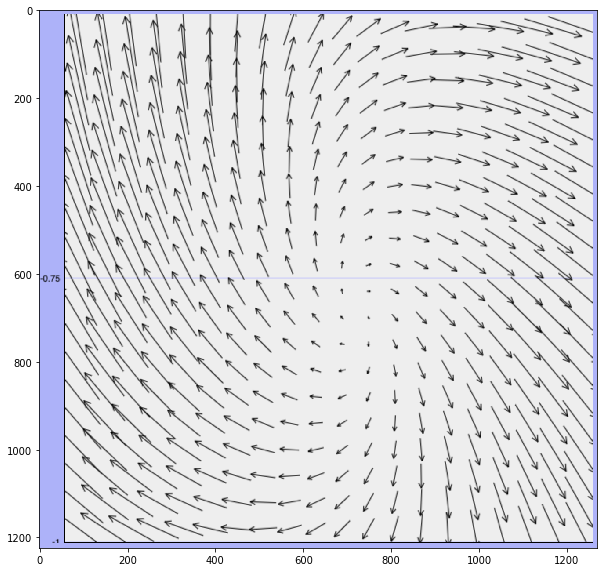

In [80]:
plt.figure(figsize=(10,10))
img=mpimg.imread('zoomin.png')
imgplot = plt.imshow(img)
plt.show()

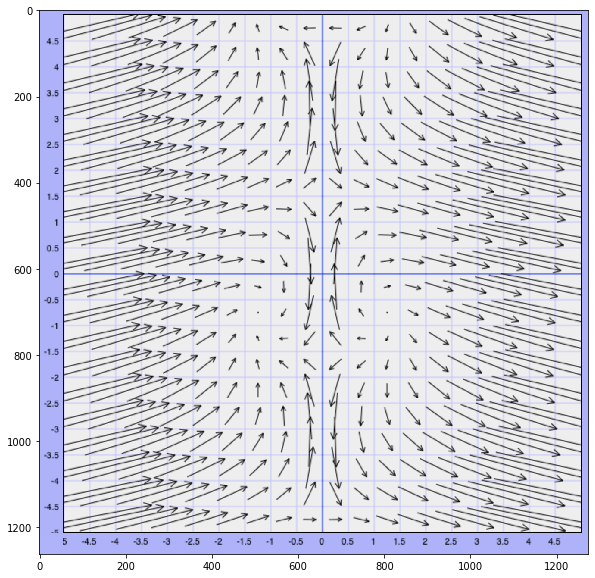

In [81]:
plt.figure(figsize=(10,10))
img=mpimg.imread('zoomout.png')
imgplot = plt.imshow(img)
plt.show()

This looks very much like a max point graph around the steady state solution. Over time, the system will move away from the steady state. Thus, we would expect this system to have two positive eigenvalues.

### ii)

**Matrix Forms**       

$$\left(\begin{array}{cc} 
x*\\
y*
\end{array}\right)=\left(\begin{array}{cc} 
f_x(x*,y*) & f_y(x*,y*)\\
g_x(x*,y*) & g_y(x*,y*)
\end{array}\right)\left(\begin{array}{cc} 
x-x*\\
y-y*
\end{array}\right)+\left(\begin{array}{cc} 
f(x*,y*)\\
g(x*,y*)
\end{array}\right)$$

**Applying this to the glider system**

Finding partial derivatives:     
$$v_v = v$$
$$v_\theta = cos(\theta)$$

$$\theta_v = -\frac{v^2+2cos(\theta)}{2v^2}$$
$$\theta_\theta = -\frac{sin(\theta)}{v}$$

Filling out matrix form:      
$$\left(\begin{array}{cc} 
2^{1/4}\\
-\pi/4
\end{array}\right)=\left(\begin{array}{cc} 
v & cos(\theta)\\
-\frac{v^2+2cos(\theta)}{2v^2} & -\frac{sin(\theta)}{v}
\end{array}\right)\left(\begin{array}{cc} 
v-2^{1/4}\\
\theta--\pi/4
\end{array}\right)+\left(\begin{array}{cc} 
sin(\theta)+\frac{v^2}{2}\\
\frac{1}{v}\big(cos(\theta)-\frac{v^2}{2}\big)
\end{array}\right)$$

$$\left(\begin{array}{cc} 
2^{1/4}\\
-\pi/4
\end{array}\right)=\left(\begin{array}{cc} 
2^{1/4} & cos(-\pi/4)\\
-\frac{(2^{1/4})^2+2cos(-\pi/4)}{2(2^{1/4})^2} & -\frac{sin(-\pi/4)}{2^{1/4}}
\end{array}\right)\left(\begin{array}{cc} 
v-2^{1/4}\\
\theta--\pi/4
\end{array}\right)+\left(\begin{array}{cc} 
sin(-\pi/4)+\frac{(2^{1/4})^2}{2}\\
\frac{1}{2^{1/4}}\big(cos(-\pi/4)-\frac{(2^{1/4})^2}{2}\big)
\end{array}\right)$$

### iii)

To find eigenvalues we only care about the matrix that is multiplying our x vector of $\left(\begin{array}{cc} 
v\\
\theta
\end{array}\right)$

That matrix is: $\left(\begin{array}{cc} 
2^{1/4} & cos(-\pi/4)\\
-\frac{(2^{1/4})^2+2cos(-\pi/4)}{2(2^{1/4})^2} & -\frac{sin(-\pi/4)}{2^{1/4}}
\end{array}\right)$

$\left(\begin{array}{cc} 
2^{1/4} & \frac{\sqrt{2}}{2}\\
-1 & -\frac{sin(-\pi/4)}{2^{1/4}}
\end{array}\right)$

In [88]:
from numpy import linalg as LA

eigenval = LA.eig(np.array([[2**(1/4),math.cos(-math.pi/4)],[-1,-(math.sin(-math.pi/4))/(2**(1/4))]]))

In [90]:
eigenval[0]

array([0.89190534+0.78658657j, 0.89190534-0.78658657j])

So we can see that the eigenvalues are both positive with imaginary components.

Both eigenvalues being positive explains the max point slope field around the steady state. Both eigenvalues having an imaginary component explains the curving/ circular behavior around the steady state and likely arises from the sin and cosine terms.